<a href="https://colab.research.google.com/github/Yolde/Production-Data-Analysis/blob/main/Copy_of_production_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Numpy, Pandas, Matplotlib, Seaborn, and Missingnoz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import missingno as msno
import seaborn as sns

In [ ]:
# Load data from the net
import pandas as pd

# Direct download link
filepath = "https://drive.google.com/uc?id=1UG924_QrrorG48roPc1jr_CP8zqWj0Pa"
df = pd.read_csv(filepath)

# Display first few rows of the dataframe
df.head()

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND
0,07-Apr-14,15/9-F-1 C,0.0,0.000,0.000,0.000,0.0,0.00000,0.000,0.00,0.000,0.0,0.0,0.0,NaN,production
1,08-Apr-14,15/9-F-1 C,0.0,NaN,NaN,NaN,0.0,1.00306,0.000,0.00,0.000,0.0,0.0,0.0,NaN,production
2,09-Apr-14,15/9-F-1 C,0.0,NaN,NaN,NaN,0.0,0.97901,0.000,0.00,0.000,0.0,0.0,0.0,NaN,production
3,10-Apr-14,15/9-F-1 C,0.0,NaN,NaN,NaN,0.0,0.54576,0.000,0.00,0.000,0.0,0.0,0.0,NaN,production
4,11-Apr-14,15/9-F-1 C,0.0,310.376,96.876,277.278,0.0,1.21599,33.098,10.48,33.072,0.0,0.0,0.0,NaN,production


In [ ]:
# Convert datetime column to Pandas datetime format (%d-%b-%y)
df["DATEPRD"] = pd.to_datetime(df["DATEPRD"], format="%d-%b-%y")
df["DATEPRD"]=pd.to_datetime(df["DATEPRD"], format="%d,%b,%y")
df.head()

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND
0,2014-04-07,15/9-F-1 C,0.0,0.000,0.000,0.000,0.0,0.00000,0.000,0.00,0.000,0.0,0.0,0.0,NaN,production
1,2014-04-08,15/9-F-1 C,0.0,NaN,NaN,NaN,0.0,1.00306,0.000,0.00,0.000,0.0,0.0,0.0,NaN,production
2,2014-04-09,15/9-F-1 C,0.0,NaN,NaN,NaN,0.0,0.97901,0.000,0.00,0.000,0.0,0.0,0.0,NaN,production
3,2014-04-10,15/9-F-1 C,0.0,NaN,NaN,NaN,0.0,0.54576,0.000,0.00,0.000,0.0,0.0,0.0,NaN,production
4,2014-04-11,15/9-F-1 C,0.0,310.376,96.876,277.278,0.0,1.21599,33.098,10.48,33.072,0.0,0.0,0.0,NaN,production


In [ ]:
# Print all column names / features
df.columns

Index(['DATEPRD', 'NPD_WELL_BORE_NAME', 'ON_STREAM_HRS',
       'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING',
       'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P',
       'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL',
       'BORE_WI_VOL', 'FLOW_KIND'],
      dtype='object')

In [ ]:
# Print all well names (unique)
df["NPD_WELL_BORE_NAME"].unique()

array(['15/9-F-1 C', '15/9-F-11', '15/9-F-12', '15/9-F-14', '15/9-F-15 D',
       '15/9-F-4', '15/9-F-5'], dtype=object)

In [ ]:
# Separate well 15/9-F-14 from dataframe
mask = df["NPD_WELL_BORE_NAME"] == "15/9-F-14"

well14_df = df[mask].reset_index()

well14_df.head()

,index,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND
0,4967,2008-02-12,15/9-F-14,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.059,0.0,0.0,0.0,NaN,production
1,4968,2008-02-13,15/9-F-14,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.068,0.0,0.0,0.0,NaN,production
2,4969,2008-02-14,15/9-F-14,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.050,0.0,0.0,0.0,NaN,production
3,4970,2008-02-15,15/9-F-14,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.066,0.0,0.0,0.0,NaN,production
4,4971,2008-02-16,15/9-F-14,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.105,0.0,0.0,0.0,NaN,production


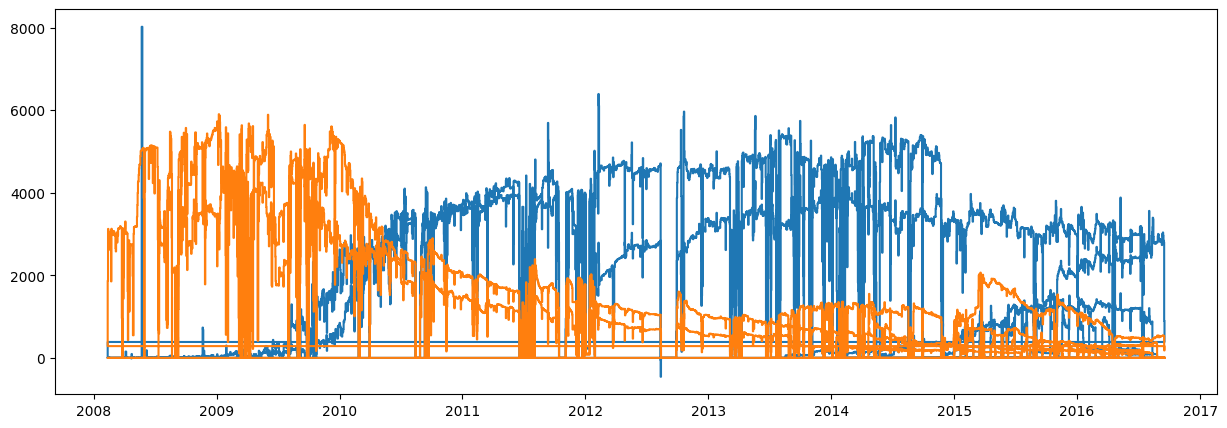

In [ ]:
# Plot water and oil production (use step)
plt.figure(figsize=(15,5))

plt.step(df["DATEPRD"], df["BORE_WAT_VOL"])
plt.step(df["DATEPRD"], df["BORE_OIL_VOL"])
#plt.step(df["DATEPRD"], df["BORE_GAS_VOL"], color="green")

plt.show()

In [ ]:
# Display summary statistics of data
well14_df.describe()

,index,DATEPRD,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL
count,3056.000000,3056,3056.000000,3050.000000,3050.000000,3050.000000,2533.000000,2860.000000,3056.000000,3056.000000,3056.000000,3056.000000,3056.000000,3056.000000,0.0
mean,6494.500000,2012-06-04 14:32:40.209423872,20.541194,233.074651,95.133791,192.653088,10.527985,69.390287,41.530601,77.103033,15.435755,1290.009817,189139.247382,2330.245746,NaN
min,4967.000000,2008-02-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-59.000000,NaN
25%,5730.750000,2010-03-24 18:00:00,24.000000,237.493000,99.621000,180.749500,0.000000,43.014158,31.020500,81.223500,2.665500,210.000000,31303.750000,695.500000,NaN
50%,6494.500000,2012-06-10 12:00:00,24.000000,246.776000,101.007500,204.247500,12.969000,71.012955,33.546000,86.963500,7.177500,881.000000,142363.000000,2965.500000,NaN
75%,7258.250000,2014-08-15 06:00:00,24.000000,261.971250,105.049000,229.632750,21.232000,100.000000,49.080250,88.539000,21.174000,2033.500000,305328.000000,3444.250000,NaN
max,8022.000000,2016-09-17 00:00:00,25.000000,334.656000,106.773000,302.110000,26.682000,100.000000,125.719000,93.510000,125.719000,5644.000000,789975.000000,5692.000000,NaN
std,882.335537,NaN,7.881136,64.923765,25.846814,57.736987,9.704603,31.064576,22.719575,25.615707,19.965158,1298.363790,184204.112292,1462.922870,NaN


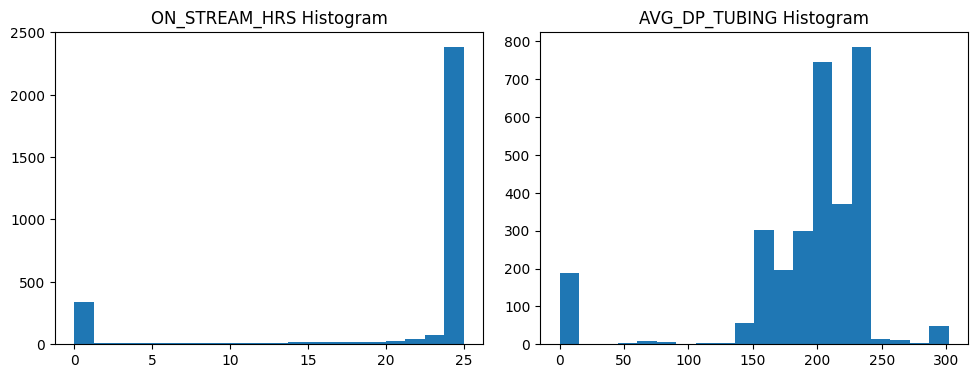

In [ ]:
 # Produce histogram of data (use subplots!)
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(well14_df["ON_STREAM_HRS"], bins=20)
plt.title("ON_STREAM_HRS Histogram")

plt.subplot(1, 2, 2)
plt.hist(well14_df["AVG_DP_TUBING"], bins=20)
plt.title("AVG_DP_TUBING Histogram")

plt.tight_layout(pad=1.5)  # Use 'pad' as a keyword argument
plt.show()

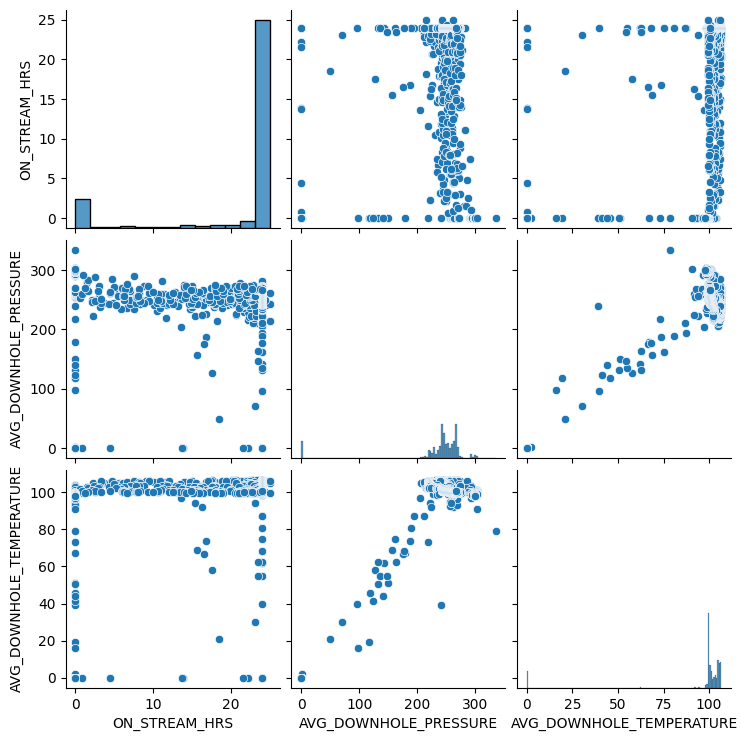

In [ ]:
# Make pairplot between features using Seaborn
sns.pairplot(well14_df[["ON_STREAM_HRS", "AVG_DOWNHOLE_PRESSURE", "AVG_DOWNHOLE_TEMPERATURE"]])
plt.show()

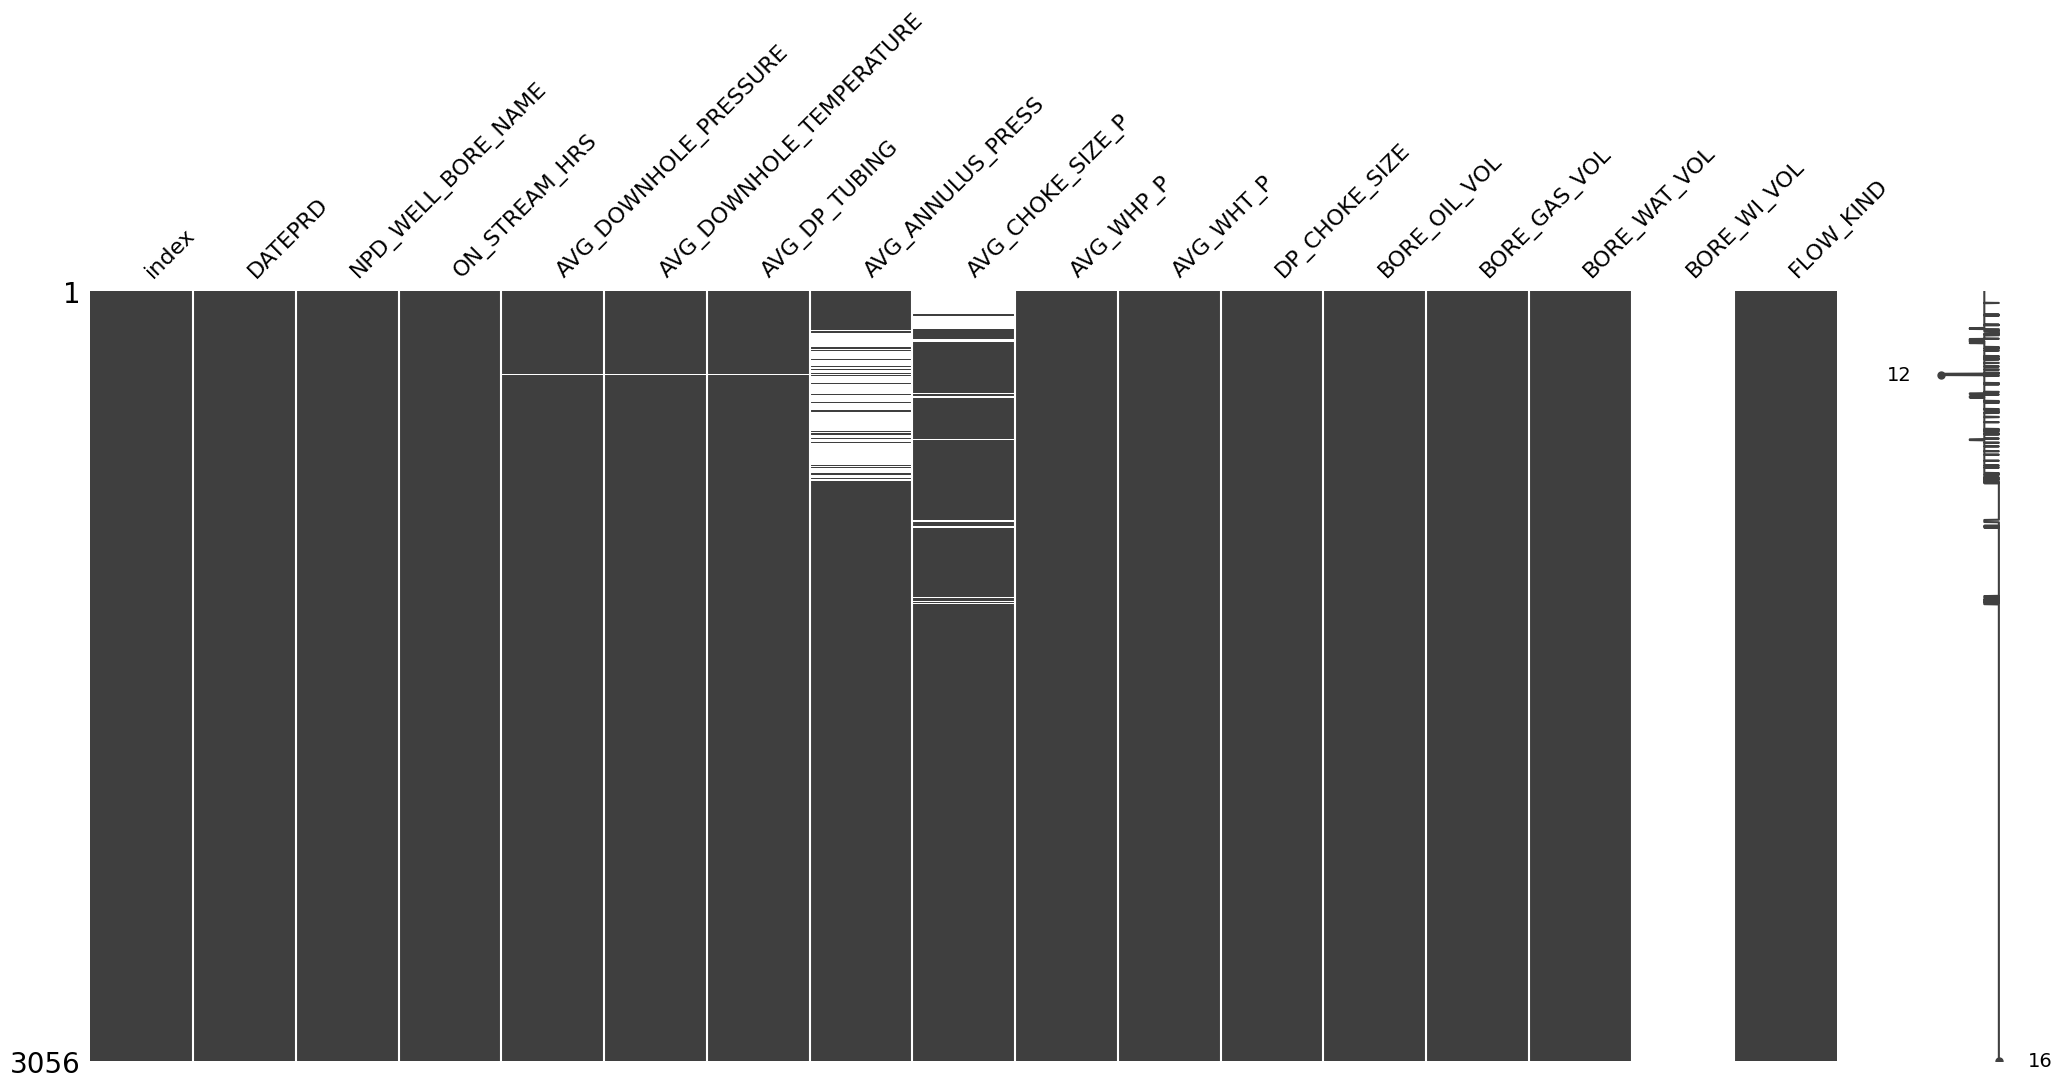

In [ ]:
# Visualize missing values (non-numeric) in data using Missingno
msno.matrix(well14_df)
plt.show()

In [ ]:
# Interpolation to fill missing values
well14_df = well14_df.interpolate(method="linear", axis=0)

well14_df.head()

<ipython-input-31-b2af22cdb496>:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  well14_df = well14_df.interpolate(method="linear", axis=0)


,index,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND
0,4967,2008-02-12,15/9-F-14,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.059,0.0,0.0,0.0,NaN,production
1,4968,2008-02-13,15/9-F-14,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.068,0.0,0.0,0.0,NaN,production
2,4969,2008-02-14,15/9-F-14,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.050,0.0,0.0,0.0,NaN,production
3,4970,2008-02-15,15/9-F-14,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.066,0.0,0.0,0.0,NaN,production
4,4971,2008-02-16,15/9-F-14,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.105,0.0,0.0,0.0,NaN,production


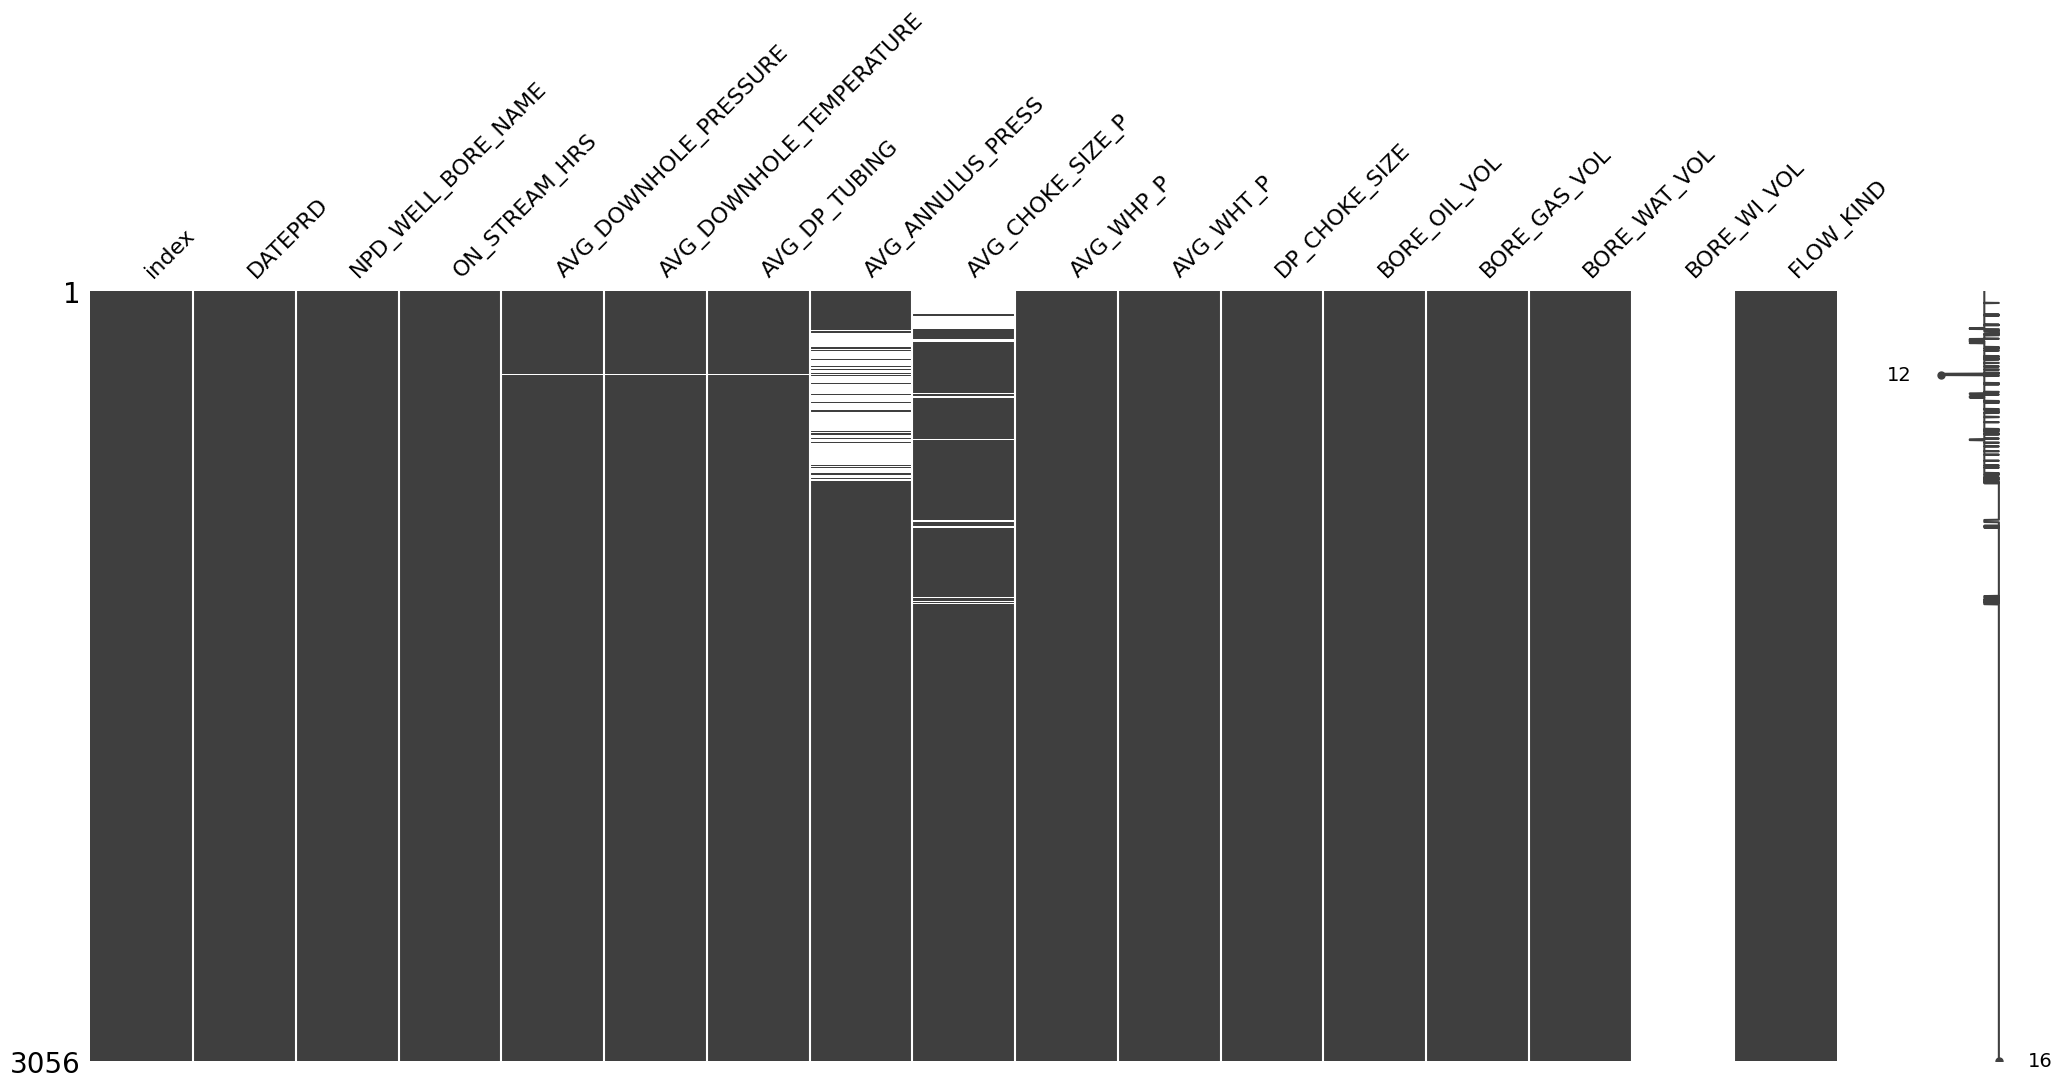

In [ ]:
# Visualize Missigno after missing values filled w/ interpolated data
msno.matrix(well14_df)
plt.show()

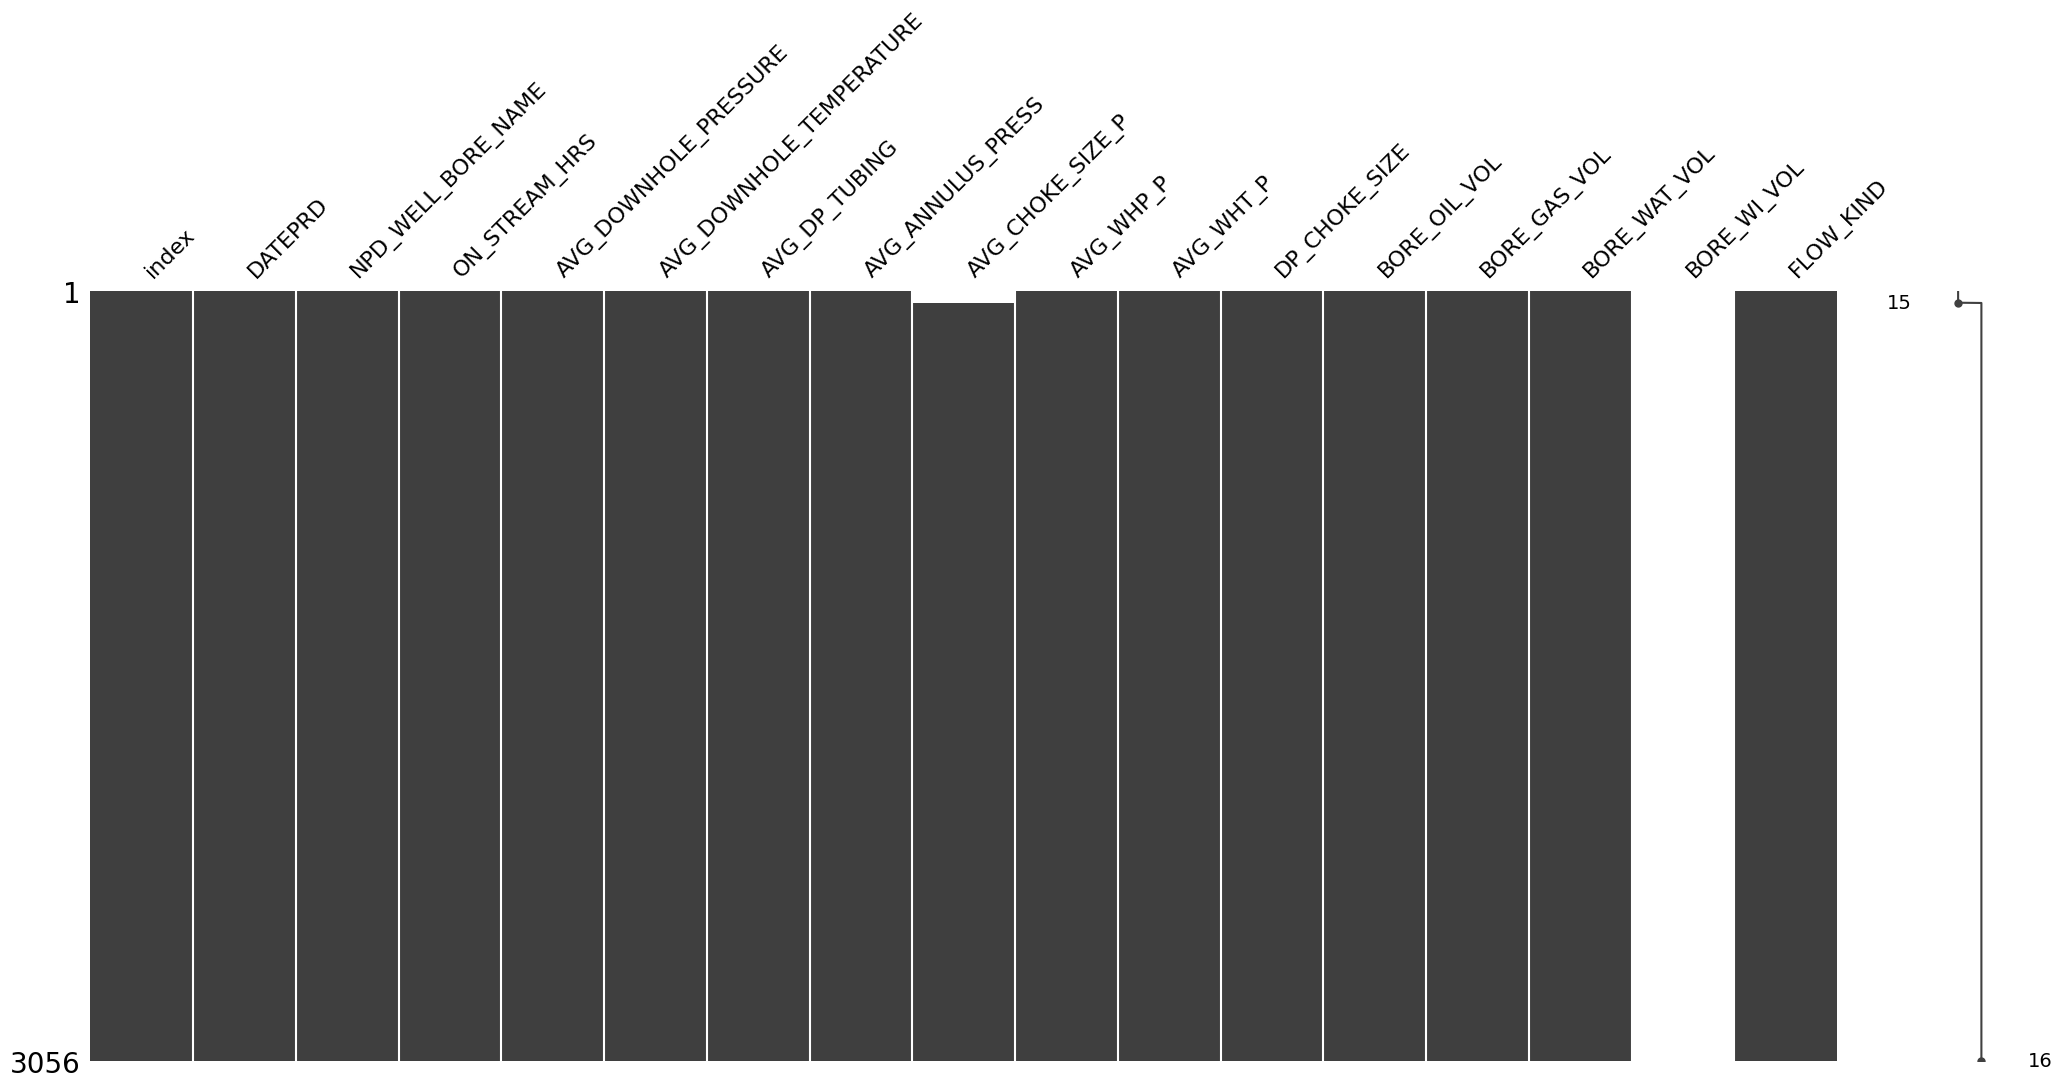

In [ ]:

# Visualize Missigno after missing values filled w/ interpolated data
msno.matrix(well14_df)
plt.show()
